In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


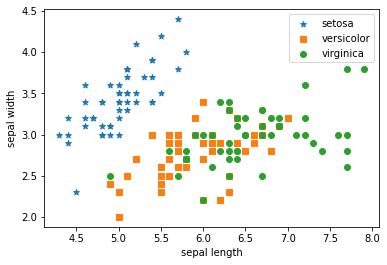

In [5]:
markers = ["*", "s", "o"] 

for i, marker in enumerate(markers): 
  x_val = iris_df[iris_df["target"] ==i]["sepal length (cm)"] 
  y_val = iris_df[iris_df["target"]==i]["sepal width (cm)"] 
  plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i]) 

plt.legend() 
plt.xlabel("sepal length") 
plt.ylabel("sepal width") 
plt.show()

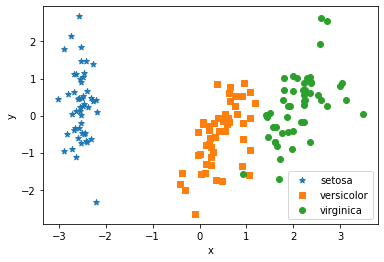

In [12]:
markers = ["*", "s", "o"] 

for i, marker in enumerate(markers):
  x_val = df_pca[df_pca["target"] ==i][0] 
  y_val = df_pca[df_pca["target"]==i][1] 
  plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i]) 
plt.legend() 
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris_df)

In [7]:
data_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [8]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(data_scaled) 
df_pca = pca.transform(data_scaled)
print(df_pca.shape)

(150, 2)


In [11]:
df_pca = pd.DataFrame(data=df_pca)
df_pca["target"] = iris.target
df_pca.head()

,0,1,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


In [13]:
df = pd.read_excel("C:/Users/seongsh/Desktop/bt/making_index.xlsx",sheet_name=0,index_col =0, header=0)

In [18]:
df2 = pd.DataFrame(data= scaler.fit_transform(df),columns = df.columns, index = df.index)

<AxesSubplot:>

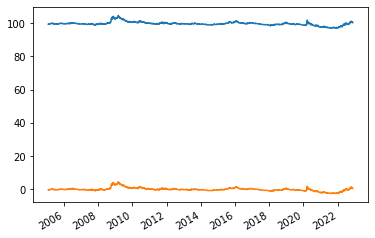

In [24]:
df.iloc[:,2].plot()
df2.iloc[:,2].plot()

In [33]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [38]:
X_ = X.resample(rule='1m').last().diff().dropna()
y_ = y.resample(rule='1m').last().diff().dropna()

<AxesSubplot:>

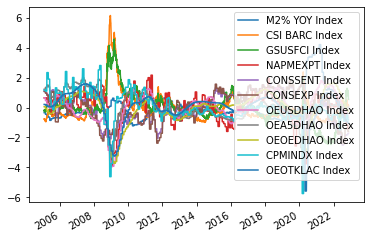

In [41]:
df2.plot()

In [48]:
pca = PCA(n_components=5)
pca.fit(X_) 
df_pca = pca.transform(X_)
print(df_pca.shape)

(213, 5)


<AxesSubplot:>

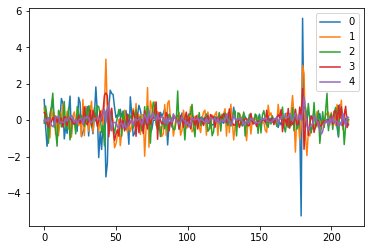

In [52]:
pd.DataFrame(df_pca).plot()

In [51]:
y_

2005-03-31   -0.056568
2005-04-30   -0.045241
2005-05-31   -0.017359
2005-06-30    0.020375
2005-07-31    0.052145
                ...   
2022-07-31   -0.186729
2022-08-31   -0.154558
2022-09-30   -0.130563
2022-10-31   -0.111260
2022-11-30    0.000000
Freq: M, Name: OEOTKLAC Index, Length: 213, dtype: float64

In [47]:
X_

,M2% YOY Index,CSI BARC Index,GSUSFCI Index,NAPMEXPT Index,CONSSENT Index,CONSEXP Index,OEUSDHAO Index,OEA5DHAO Index,OEOEDHAO Index,CPMINDX Index
2005-03-31,-0.107282,0.323598,0.279616,-0.290953,-0.119135,-0.145407,-0.201809,0.153147,-0.163384,1.238678
2005-04-30,-0.085826,0.261218,0.074564,0.394865,-0.389173,-0.527101,-0.210983,-0.119854,-0.144532,-0.437181
2005-05-31,-0.214564,0.000000,-0.093205,-0.353300,-0.063538,-0.154495,-0.100905,-0.352904,-0.050272,-1.384405
2005-06-30,0.107282,-0.038988,-0.195731,-0.852077,0.722749,0.881531,0.128424,-0.286319,0.031420,-0.437181
2005-07-31,0.042913,-0.226129,-0.055923,0.955988,0.039712,0.045440,0.210983,-0.059927,0.119396,-0.218590
...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.128738,-0.323598,-0.438065,0.394865,0.119135,-0.018176,-0.183463,0.026634,-0.295349,-0.437181
2022-08-31,-0.257477,0.054583,0.493988,-0.665035,0.532134,0.972411,-0.165117,-0.006659,-0.282781,0.145727
2022-09-30,-0.257477,0.245623,0.978655,-0.332518,0.031769,0.000000,-0.201809,-0.039951,-0.219940,0.255022
2022-10-31,0.000000,-0.292408,-0.251654,-0.270171,0.103250,-0.163583,-0.201809,0.000000,-0.119396,-0.327885


In [45]:
pd.DataFrame(df_pca)

,0,1,2,3,4
0,-1.986021,0.192154,-0.913355,-1.305835,0.354916
1,-1.980433,0.188559,-0.929107,-1.307373,0.363469
2,-2.000427,0.199214,-0.891039,-1.305685,0.342814
3,-1.999029,0.198315,-0.894977,-1.306070,0.344953
4,-2.003308,0.200626,-0.886576,-1.305656,0.340394
...,...,...,...,...,...
4695,2.383992,-1.338277,-0.193946,1.219953,-0.596992
4696,2.220563,-1.261394,0.032626,1.216090,-0.719817
4697,2.206158,-1.254335,0.054942,1.216239,-0.731919
4698,2.206158,-1.254335,0.054942,1.216239,-0.731919
